In [2]:
# a. set magic 
%load_ext autoreload
%autoreload 2

# b. load packages 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import autograd.numpy as np


from autograd import grad, hessian
import copy

# c. local modules
from contracept_model_copy import child_model_new
from contracept_model import child_model 


from contracept_model_3 import child_model3 
import BI_estimate as estimate
import back as solver

In [3]:
model3 = child_model3()
model = child_model()


In [ ]:
model3.grid

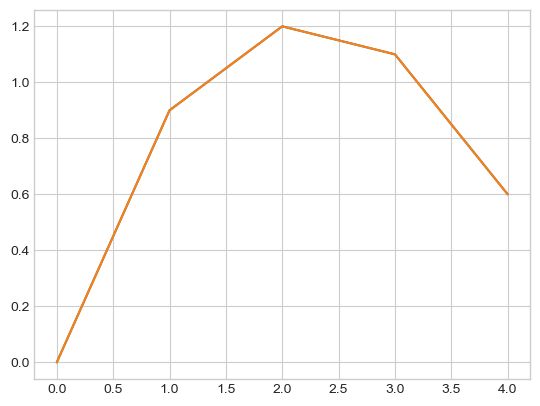

In [4]:
x= range(5)
fx = model3.utility
#x2 = model.cost0[5:10]

plt.plot(x, fx)
#plt.plot(x, fx2)
#plt.axhline(y=0, color='r', linestyle='-')


In [ ]:
dta3 = model3.read_data()

In [5]:
solver.P_list(model3,dta3)
V3, pnc3 = solver.BackwardsInduction3(model3)
data3 = model3.sim_data(pnc3)





In [6]:
data0 = data3[(data3['t']==model.T-1)]
data0.x.value_counts()

2    2175
3     510
1      58
4       4
0       1
Name: x, dtype: int64

In [9]:
samplesize = data3.shape[0]
theta = (0.3, -0.1, -0.2 )
theta0 = (0, 0, 0 )
pnames= ( 'eta2', 'eta3', 'mu1' )



Simulated data

In [ ]:
# 3 variables
samplesize = data3.shape[0]
par_mu1 = copy.copy(model3.mu1)
par_eta2 = copy.copy(model3.eta2)
par_eta3 = copy.copy(model3.eta3)

I = 19


log_lik = np.nan + np.zeros((I,I,I))
mu1= np.linspace(-1.9,1.9,I)
eta2= np.linspace(-1.9,1.9,I)
eta3 = np.linspace(-1.9,1.9,I)
#iter = 0

for i in range(I):
    for j in range(I):
        for k in range(I):

       
                # Estimate parameters
                pnames = ['eta2','eta3', 'mu1']
                theta = np.array([eta2[i], eta3[j], mu1[k]])
                log_lik[i,j,k]=estimate.ll3(theta,model3, solver, data3, pnames)
                #print(iter)
                #iter =iter+1

log_lik *= samplesize*(-1)

#Re-inset the true parameters 
model3.eta2 = copy.copy(par_eta2)
model3.eta3 = copy.copy(par_eta3)
model3.mu1 = copy.copy(par_mu1)


x, y, z= np.unravel_index(np.argmax(log_lik), log_lik.shape)
print(eta2[x], eta3[y], mu1[z])

In [ ]:
# 4 variables 
samplesize = data3.shape[0]
par_mu1 = copy.copy(model3.mu1)
par_eta1 = copy.copy(model3.eta1)
par_eta2 = copy.copy(model3.eta2)
par_eta3 = copy.copy(model3.eta3)

I = 19


log_lik = np.nan + np.zeros((I,I,I,I))
mu1= np.linspace(-0.9,0.9,I)
eta1= np.linspace(-0.9,0.9,I)
eta2= np.linspace(-0.9,0.9,I)
eta3 = np.linspace(-0.9,0.9,I)
#iter = 0

for i in range(I):
    for j in range(I):
        for k in range(I):
            for l in range(I):
       
                # Estimate parameters
                pnames = ['eta2','eta3', 'mu1']
                theta = np.array([eta2[l],eta2[i], eta3[j], mu1[k] ])
                log_lik[l,i,j,k]=estimate.ll3(theta,model3, solver, data3, pnames)
                #print(iter)
                #iter =iter+1

log_lik *= samplesize*(-1)

#Re-inset the true parameters 
model3.eta1 = copy.copy(par_eta1)
model3.eta2 = copy.copy(par_eta2)
model3.eta3 = copy.copy(par_eta3)
model3.mu1 = copy.copy(par_mu1)


x, y, z, v = np.unravel_index(np.argmax(log_lik), log_lik.shape)
print(eta1[x], eta2[y], eta3[z], mu1[v])

Real data

In [ ]:
model3 = child_model3()

In [ ]:
dta3 = model3.read_data()
solver.P_list(model3,dta3)

In [ ]:
#loop der ikke gemmer - DEn bruger vi ikke umiddelbart
samplesize = dta3.shape[0]
par_mu1 = copy.copy(model3.mu1)
par_eta2 = copy.copy(model3.eta2)
par_eta3 = copy.copy(model3.eta3)

I = 51


log_lik = np.nan + np.zeros((I,I,I))
mu1= np.linspace(-1,1,I)
eta2= np.linspace(-1,1,I)
eta3 = np.linspace(-1,1,I)
result = -10000000000000
eta2_true = 0
eta3_true = 0
mu1_true = 0

for i in range(I):
    for j in range(I):
        for k in range(I):
       
            # Estimate parameters
            pnames = ['eta2','eta3', 'mu1']
            theta = np.array([eta2[i], eta3[j], mu1[k] ])
            log_lik=(estimate.ll3(theta,model3, solver, dta3, pnames))*samplesize*(-1)
            if log_lik > result:
                result = log_lik
                eta2_true = eta2[i]
                eta3_true = eta2[j]
                mu1_true = mu1[k]


#Re-inset the true parameters 
model3.eta2 = copy.copy(par_eta2)
model3.eta3 = copy.copy(par_eta3)
model3.mu1 = copy.copy(par_mu1)



print(log_lik, eta2_true, eta3_true, mu1_true)

In [ ]:
samplesize = dta3.shape[0]
par_mu1 = copy.copy(model3.mu1)
par_eta2 = copy.copy(model3.eta2)
par_eta3 = copy.copy(model3.eta3)

I = 50


log_lik = np.nan + np.zeros((I,I,I))
mu1= np.linspace(0,1.8,I)
eta2= np.linspace(0,1.8,I)
eta3 = np.linspace(-0.9,0.9,I)
iter = 0

for i in range(I):
    for j in range(I):
        for k in range(I):

       
    
                # Estimate parameters
                pnames = ['eta2','eta3', 'mu1']
                theta = np.array([eta2[i], eta3[j], mu1[k]])
                log_lik[i,j,k]=estimate.ll3(theta,model3, solver, dta3, pnames)
                print(iter)
                iter =iter+1

log_lik *= samplesize*(-1)

#Re-inset the true parameters 
model3.eta2 = copy.copy(par_eta2)
model3.eta3 = copy.copy(par_eta3)
model3.mu1 = copy.copy(par_mu1)


x, y, z= np.unravel_index(np.argmax(log_lik), log_lik.shape)
print(eta2[x], eta3[y], mu1[z])

In [ ]:
log_lik[x,y,z]


## Model with Religion

Sim data

In [ ]:
model = child_model()
V, pnc = solver.BackwardsInduction(model)
data = model.sim_data(pnc)
solver.P_list(model,data)

print(pnc)
        
datad1 = data[(data['dx1']==1)]
print(datad1.dx1.value_counts())




In [ ]:
samplesize = data.shape[0]
par_mu1 = copy.copy(model.mu1)
par_mu2 = copy.copy(model.mu2)
par_eta1 = copy.copy(model.eta1)
par_eta2 = copy.copy(model.eta2)
par_eta3 = copy.copy(model.eta3)

I = 10


log_lik = np.nan + np.zeros((I,I,I,I,I))
mu1= np.linspace(0,0.9,I)
mu2= np.linspace(-0.9,0,I)
eta1= np.linspace(-0.4,0.5,I)
eta2= np.linspace(0,0.9,I)
eta3 = np.linspace(-0.4,0.5,I)
iter = 0

for i in range(I):
    for j in range(I):
        for k in range(I):
            for l in range(I):
                for m in range(I):
       
                    # Estimate parameters
                    pnames = ['eta1','eta2','eta3', 'mu1', 'mu2']
                    theta = np.array([eta1[m],eta2[i], eta3[j], mu1[k] , mu2[l]])
                    log_lik[m,i,j,k,l]=estimate.ll(theta,model, solver,data, pnames)
                    #print(log_lik[i,j,k],eta2[i], eta3[j], mu1[k])
                    print(iter)
                    iter =iter+1


log_lik *= samplesize*(-1)

#Re-inset the true parameters 
model.eta2 = copy.copy(par_eta2)
model.eta3 = copy.copy(par_eta3)
model.mu1 = copy.copy(par_mu1)
model.mu2 = copy.copy(par_mu2)

w, x, y, z, v = np.unravel_index(np.argmax(log_lik), log_lik.shape)
print(log_lik[w,x,y,z,v], eta1[w], eta2[x], eta3[y], mu1[z], mu2[v])



In [ ]:
log_lik[9,x,y,z,v]

In [ ]:
samplesize = data.shape[0]
theta = (0.3, -0.1, -0.2, -0.4 )
#theta = (0, 0, 0 , 0)
pnames= ("eta2", "eta3", 'mu1', 'mu2' )

estimate.ll(theta, model, solver, data, pnames, out=1)*samplesize*(-1)


In [ ]:
samplesize = data.shape[0]
par_mu1 = copy.copy(model.mu1)
par_mu2 = copy.copy(model.mu2)
par_eta2 = copy.copy(model.eta2)
par_eta3 = copy.copy(model.eta3)

I = 21


log_lik = np.nan + np.zeros((I,I,I,I))
mu1= np.linspace(-1,1,I)
mu2= np.linspace(-1,1,I)
eta2= np.linspace(-1,1,I)
eta3 = np.linspace(-1,1,I)
result = -10000000000000
eta2_true = 0
eta3_true = 0
mu1_true = 0
mu2_true = 0

for i in range(I):
    for j in range(I):
        for k in range(I):
            for l in range(I):
       
                # Estimate parameters
                pnames = ['eta2','eta3', 'mu1', 'mu2']
                theta = np.array([eta2[i], eta3[j], mu1[k], mu2[l] ])
                log_lik=(estimate.ll(theta,model, solver, data, pnames))*samplesize*(-1)
                if log_lik > result:
                    result = log_lik
                    eta2_true = eta2[i]
                    eta3_true = eta2[j]
                    mu1_true = mu1[k]
                    mu2_true = mu2[l]


#Re-inset the true parameters 
model.eta2 = copy.copy(par_eta2)
model.eta3 = copy.copy(par_eta3)
model.mu1 = copy.copy(par_mu1)
model.mu2 = copy.copy(par_mu2)



print(log_lik, eta2_true, eta3_true, mu1_true, mu2_true)

In [ ]:
#LL tjek
pnames = ['mu1','eta3', 'mu1', 'mu2']
theta = np.array([eta2[i], eta3[j], mu1[k] , mu2[l]])
log_lik[i,j,k,l]=estimate.ll(theta,model, solver,data, pnames)


Real data

In [ ]:
dta = model.read_data()
solver.P_list(model,dta)

In [ ]:
samplesize = dta.shape[0]
par_mu1 = copy.copy(model.mu1)
par_mu2 = copy.copy(model.mu2)
par_eta2 = copy.copy(model.eta2)
par_eta3 = copy.copy(model.eta3)

I = 11


log_lik = np.nan + np.zeros((I,I,I,I))
mu1= np.linspace(-1,1,I)
mu2= np.linspace(-1,1,I)
eta2= np.linspace(-1,1,I)
eta3 = np.linspace(-1,1,I)
iter = 0

for i in range(I):
    for j in range(I):
        for k in range(I):
            for l in range(I):
       
                # Estimate parameters
                pnames = ['eta2','eta3', 'mu1', 'mu2']
                theta = np.array([eta2[i], eta3[j], mu1[k] , mu2[l]])
                log_lik[i,j,k,l]=estimate.ll(theta,model, solver,dta, pnames)
                #print(log_lik[i,j,k],eta2[i], eta3[j], mu1[k])
                print(iter)
                iter =iter+1


log_lik *= samplesize*(-1)

#Re-inset the true parameters 
model.eta2 = copy.copy(par_eta2)
model.eta3 = copy.copy(par_eta3)
model.mu1 = copy.copy(par_mu1)
model.mu2 = copy.copy(par_mu2)

x, y, z, v = np.unravel_index(np.argmax(log_lik), log_lik.shape)
print(eta2[x], eta3[y], mu1[z], mu2[v])



## two parameters test

In [ ]:
samplesize = data.shape[0]

par_mu1 = copy.copy(model3.mu1)
par_eta3 = copy.copy(model3.eta3)

I = 51


log_lik = np.nan + np.zeros((I,I))
mu1= np.linspace(-1,1,I)
eta3 = np.linspace(-1,1,I)

for i in range(I):
    for j in range(I):
       
            # Estimate parameters
            pnames = ['mu1','eta3']
            theta = np.array([mu1[i], eta3[j]])
            log_lik[i,j]=estimate.ll(theta,model3, solver, data, pnames)


log_lik *= samplesize*(-1)

#Re-inset the true parameters 
model3.mu1 = copy.copy(par_mu1)
model3.eta3 = copy.copy(par_eta3)



x, y = np.unravel_index(np.argmax(log_lik), log_lik.shape)
print(mu1[x], eta3[y])


In [ ]:
# plot figure in three dimensions
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1,projection='3d', computed_zorder=False)

# Make data.
X, Y = np.meshgrid(mu1, eta3,indexing='ij')
x, y = np.unravel_index(np.argmax(log_lik), log_lik.shape)

# Plot the surface.
surf = ax.plot_surface(X, Y, log_lik, cmap=cm.jet)

#Plot max value
max = ax.scatter(mu1[x], eta3[y], log_lik[x,y], color=['black'], marker='o', s=10)

# Customize the axis.
ax.set_xlabel(f'mu1')
ax.set_ylabel(f'eta3')
ax.set_title(f'Log-likelihood (2,3)')
ax.invert_xaxis()

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
print(mu1[x], eta3[y])